In [230]:
import random
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [223]:
fuel = pd.read_csv('datasets/fuel.csv')

In [234]:
X = fuel.copy()
y = X.pop('FE')

pair1 = (StandardScaler(), make_column_selector(dtype_include=np.number))
pair2 = (OneHotEncoder(sparse=False), make_column_selector(dtype_include=object))
preprocessor = make_column_transformer(pair1, pair2)
X = preprocessor.fit_transform(X)
y = np.log(y)
input_shape = [X.shape[1]]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,-0.235504,0.015216,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1103,-0.388724,0.015216,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1104,-0.235504,0.015216,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1105,-0.235504,0.015216,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### High level APIs 

In [236]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')
history = model.fit(X, y, batch_size=128, epochs=200)

Epoch 1/200
9/9 [==============================] - 0s 2ms/step - loss: 3.2668
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 1.7450
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8107
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4035
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1886
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1459
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1253
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1030
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0920
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 12/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0759
Epoch 13/200
9/9 [==============================] - 0s 1ms/st

<AxesSubplot:>

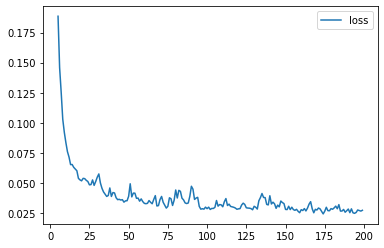

In [239]:
history_df = pd.DataFrame(history.history)
history_df[5:].plot()

In [1]:
# https://www.tensorflow.org/tutorials/keras/regression